In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")



In [2]:
# _METRICS_FILE = './files/benchmark_sensitivityAnalysis_estafa'
_METRICS_FILE = './files/benchmark_sensitivityAnalysis2'
_METRIC = 'timeperinstance'
_CLASSIFIER = 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']
classifiers_to_remove = [ 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
#{k:i+1 for i,k in enumerate(metrics_table.index)}
datasets_dict = {'TwoPatterns': 1,
 'CinCECGtorso': 2,
 'TwoLeadECG': 3,
 'Wafer': 4,
 'pendigits': 5,
 'FacesUCR': 6,
 'Mallat': 7,
 'FaceAll': 8,
 'Symbols': 9,
 'ItalyPowerDemand': 10,
 'ECG5000': 11,
 'MoteStrain': 12,
 'NonInvasiveFetalECGThorax1': 13,
 'NonInvasiveFetalECGThorax2': 14,
 'SwedishLeaf': 15,
 'FordA': 16,
 'Yoga': 17,
 'UWaveGestureLibraryX': 18,
 'FordB': 19,
 'ElectricDevices': 20,
 'UWaveGestureLibraryY': 21,
 'UWaveGestureLibraryZ': 22,
 'HandOutlines': 23,
 'InsectWingbeatSound': 24,
 'ShapesAll': 25,
 'MedicalImages': 26,
 'PhalangesOutlinesCorrect': 27,
 'ChlorineConcentration': 28,
 'Phoneme': 29}

In [4]:
#metrics_table_full_kappa

In [4]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~(metrics.classifier.str.contains('keras') & metrics.classifier.str.contains('pool') & ~metrics.classifier.str.contains('60x90'))]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics.dataset.isin(list(datasets_dict.keys()))]


metrics['instancespersecond'] = metrics['instances']/metrics['total_time']
metrics['timeperinstance'] = metrics['total_time']/metrics['instances']*1000
metrics['minutes'] = metrics['total_time']/60

metrics_table_full_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
#metrics_table_full_kappa = metrics_table_full_kappa.dropna()
metrics_table_full_kappa = metrics_table_full_kappa.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full_kappa = metrics_table_full_kappa.sort_values(by=list(metrics_table_full_kappa.columns), ascending=False)
metrics_table_full_kappa = metrics_table_full_kappa[metrics_table_full_kappa.columns[0:]]
columns_full = list(metrics_table_full_kappa.columns)
columns_full = [columns_full[1]] + [columns_full[0]] + columns_full[2:]
metrics_table_full_kappa = metrics_table_full_kappa[columns_full]

metrics_table_full = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
#metrics_table_full = metrics_table_full.dropna()
metrics_table_full = metrics_table_full.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full = metrics_table_full.reindex(index=metrics_table_full_kappa.index)
metrics_table_full = metrics_table_full[metrics_table_full.columns[0:]]
columns_full = list(metrics_table_full.columns)
columns_full = [columns_full[1]] + [columns_full[0]] + columns_full[2:]
metrics_table_full = metrics_table_full[columns_full]

metrics_full = metrics.copy()

metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier', 'MOA_NaiveBayes'])]


print(len(metrics.dataset.unique()), "datasets")
metrics.sample(100)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,instancespersecond,timeperinstance,minutes
2819,FordA,keras_parallel_keras_parallel_3_Dilated_Conv_p...,4831,500,2,0.923906,0.831710,0.176709,0.100043,0.276752,9.542280,5.402333,9.542280,506.273111,1.975218,0.159038
6350,Phoneme,MOA_LeveragingBag,2110,1024,39,0.119289,0.000000,0.521069,0.000016,0.521085,109.945569,0.003424,109.948993,19.190717,52.108527,1.832483
9006,Yoga,MOA_SingleClassifierDrift,3300,426,2,0.553349,0.128577,0.000483,0.000414,0.000897,0.159446,0.136606,0.296052,11146.685928,0.089713,0.004934
1469,ECG5000,MOA_LeveragingBag,5000,140,5,0.863420,0.751867,0.010877,0.003436,0.014313,5.438550,1.717865,7.156414,698.673903,1.431283,0.119274
8995,Yoga,MOA_NaiveBayes,3300,426,2,0.553349,0.128577,0.000075,0.000435,0.000510,0.024810,0.143473,0.168283,19609.801671,0.050995,0.002805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,InsectWingbeatSound,keras_parallel_keras_parallel_3_Dilated_Conv_p...,2110,256,11,0.683337,0.632102,0.145129,0.099587,0.244717,3.483100,2.390097,3.483100,605.782258,1.650758,0.058052
5953,NonInvasiveFetalECGThorax2,sklearn_MLPClassifier,3755,750,42,0.497109,0.462365,0.004863,0.000636,0.005498,1.828300,0.239105,2.067405,1816.286404,0.550574,0.034457
2982,FordB,sklearn_MLPClassifier,4436,500,2,0.682293,0.338487,0.004408,0.000547,0.004955,1.957020,0.242895,2.199915,2016.441606,0.495923,0.036665
6209,PhalangesOutlinesCorrect,MOA_OzaBoostAdwin,2658,80,2,0.692392,0.277290,0.004548,0.000862,0.005410,1.209773,0.229176,1.438949,1847.181919,0.541365,0.023982


In [5]:
print(list(metrics_table_full.columns))
print(list(metrics_table_full.index))

['keras_3_Dilated_Conv', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'MOA_AdaptiveRandomForest', 'sklearn_MLPClassifier', 'MOA_NaiveBayes', 'MOA_SingleClassifierDrift', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_LeveragingBag', 'MOA_RandomHoeffdingTree', 'MOA_OzaBoostAdwin', 'MOA_OzaBoost', 'sklearn_BernoulliNB', 'MOA_HoeffdingAdaptiveTree', 'MOA_ActiveClassifier', 'MOA_OzaBag', 'MOA_AdaHoeffdingOptionTree', 'MOA_OzaBagAdwin', 'MOA_OzaBagASHT', 'sklearn_PassiveAggressiveClassifier', 'sklearn_SGDClassifier', 'sklearn_Perceptron', 'MOA_KUE', 'MOA_DecisionStump', 'MOA_OCBoost', 'MOA_SPegasos', 'MOA_MajorityClass']
['TwoPatterns', 'CinCECGtorso', 'Wafer', 'TwoLeadECG', 'pendigits', 'FaceAll', 'FacesUCR', 'Mallat', 'Symbols', 'ChlorineConcentration', 'ItalyPowerDemand', 'SwedishLeaf', 'ECG5000', 'MoteStrain', 'Yoga', 'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'FordA', 'FordB', 'UWaveGestureLibraryX', 'ElectricDevices', 'UWa

In [6]:
#kappa table
metrics_table_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
#metrics_table_kappa = metrics_table_kappa.dropna()
metrics_table_kappa = metrics_table_kappa.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_kappa = metrics_table_kappa.sort_values(by=list(metrics_table_kappa.columns), ascending=False)
metrics_table_kappa = metrics_table_kappa[metrics_table_kappa.columns[0:]]

metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
#metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.reindex(index=metrics_table_kappa.index)
metrics_table = metrics_table[metrics_table.columns[0:]]

metrics_table = metrics_table.reindex(datasets_dict.keys(), axis=0)
metrics_table

limits = ( 0, metrics_table.max().max())
print(limits)

metrics_table.to_csv('./files/timeperinstance_table.csv', sep=',', encoding='utf-8')


metrics_table

(0, 86.71182945916667)


classifier,keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90,sklearn_MLPClassifier,MOA_NaiveBayes,MOA_SingleClassifierDrift,MOA_ASHoeffdingTree,MOA_HoeffdingTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,
TwoPatterns,1.587400,0.094113,0.028720,0.049070,0.064636,0.059817,1.308990,0.520365,0.056452
CinCECGtorso,2.296192,0.866581,0.380395,0.699634,0.851023,0.857523,15.543146,7.299272,0.241942
TwoLeadECG,1.902573,0.079045,0.010149,0.016725,0.023391,0.025946,0.468204,0.362255,0.023638
Wafer,1.458948,0.108857,0.051860,0.035166,0.034374,0.030472,0.754378,0.590655,0.032772
pendigits,1.241148,0.070988,0.008607,0.017107,0.016974,0.017195,0.331867,0.236476,0.079704
FacesUCR,1.748797,0.096534,0.091877,0.175441,0.205539,0.208945,3.334478,2.819713,0.112125
Mallat,1.937608,0.628570,0.481864,0.932388,1.068472,1.077242,19.526912,11.152084,0.234667
FaceAll,1.640330,0.094806,0.097782,0.182200,0.212948,0.206039,3.370354,2.815929,0.112897
Symbols,1.940033,0.402064,0.128869,0.245910,0.315360,0.293853,6.622575,3.277581,0.170418


In [8]:
classifier_labels_full = {
    'keras_3_Dilated_Conv': 'CNN',
    'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90':'ADLStream',
    'sklearn_MLPClassifier':'MLP',
    'MOA_NaiveBayes':'NB',
    'MOA_SingleClassifierDrift':'SCD',
    'MOA_ASHoeffdingTree':'ASHT',
    'MOA_HoeffdingTree':'HT',
    'MOA_HoeffdingOptionTree':'HOT',
    'MOA_LeveragingBag':'LBAG',
    'MOA_RandomHoeffdingTree':'RHT',
    'MOA_OzaBoostAdwin':'BO-AD',
    'MOA_OzaBoost':'BO',
    'sklearn_BernoulliNB':'BNB',
    'MOA_HoeffdingAdaptiveTree':'HAT',
    'MOA_ActiveClassifier':'AC',
    'MOA_OzaBag':'BA',
    'MOA_AdaHoeffdingOptionTree':'ADHT',
    'MOA_OzaBagAdwin':'BA-AD',
    'MOA_OzaBagASHT':'B-ASHT',
    'sklearn_PassiveAggressiveClassifier':'PAC',
    'sklearn_SGDClassifier':'SGD',
    'sklearn_Perceptron':'P',
    'MOA_DecisionStump':'DST',
    'MOA_OCBoost':'OCBO',
    'MOA_SPegasos':'SPEG',
    'MOA_MajorityClass':'MC',
    'MOA_Perceptron':'P',
    'MOA_AdaptiveRandomForest': 'ARF',
    'MOA_KUE':'KUE'
}

[classifier_labels_full[l] for l in metrics_table_full.columns]

abbr_full_ls = [classifier_labels_full[l] for l in metrics_table_full.columns]
abbr_ls = [classifier_labels_full[l] for l in metrics_table.columns]

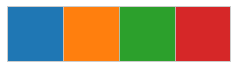

In [9]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)
pal = {'ADLStream':(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'CNN':(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


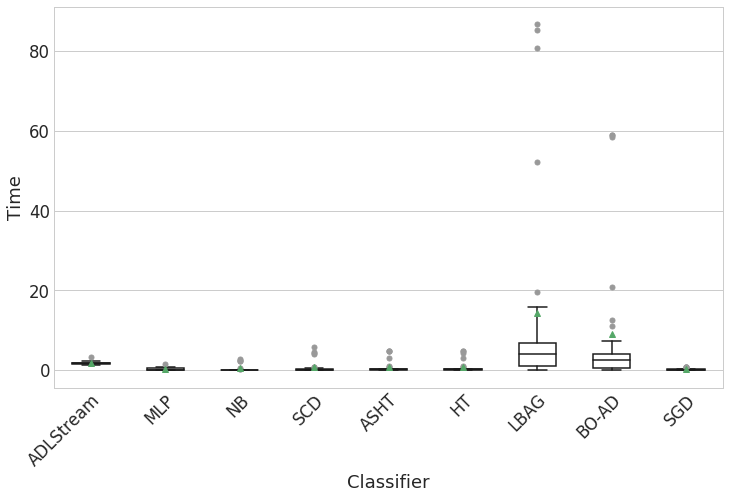

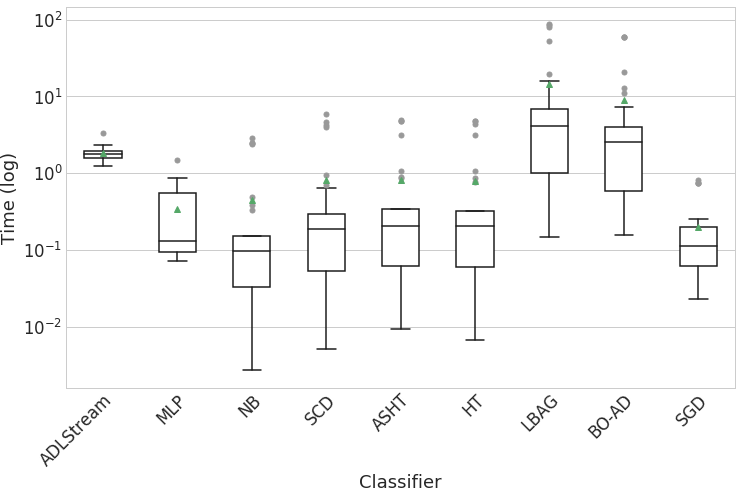

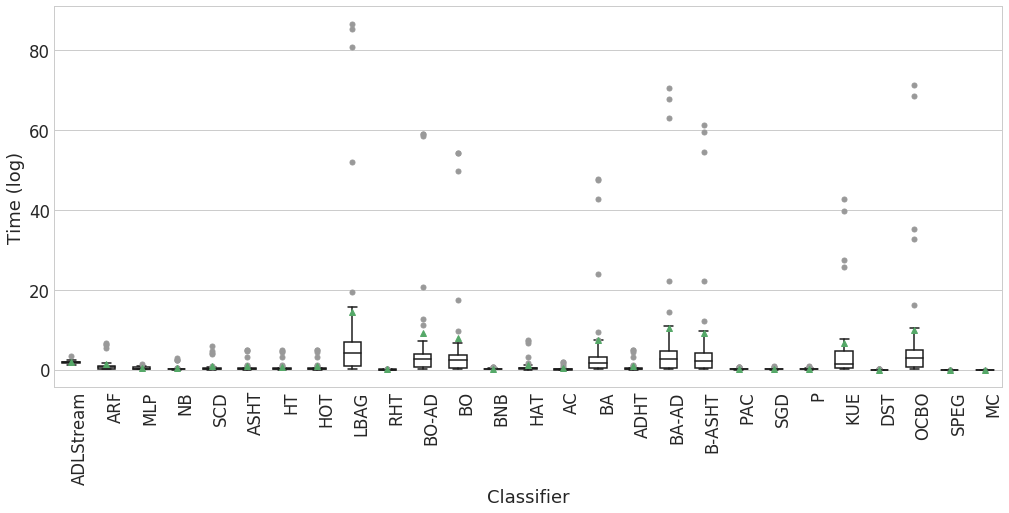

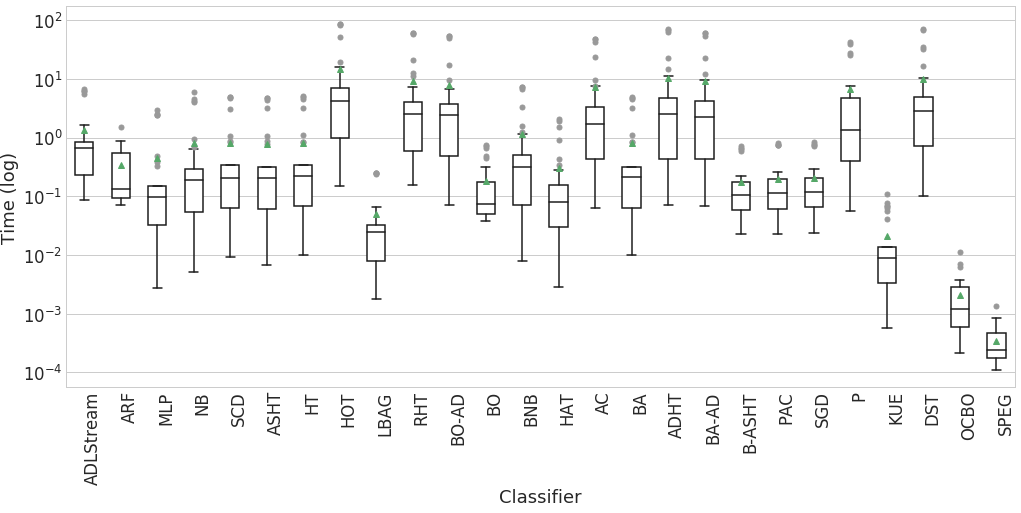

In [10]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot-top-time.eps", format='eps', bbox_inches='tight')

    
# Log scaled 
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot-top-time-log.eps", format='eps', bbox_inches='tight')

sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(17,7))
    sns.boxplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    
    plt.savefig("files/plots/boxplot-time.eps", format='eps', bbox_inches='tight')
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(17,7))
    sns.boxplot(data=metrics_table_full[metrics_table_full.columns[2:]],  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    
    plt.savefig("files/plots/boxplot-time-log.eps", format='eps', bbox_inches='tight')

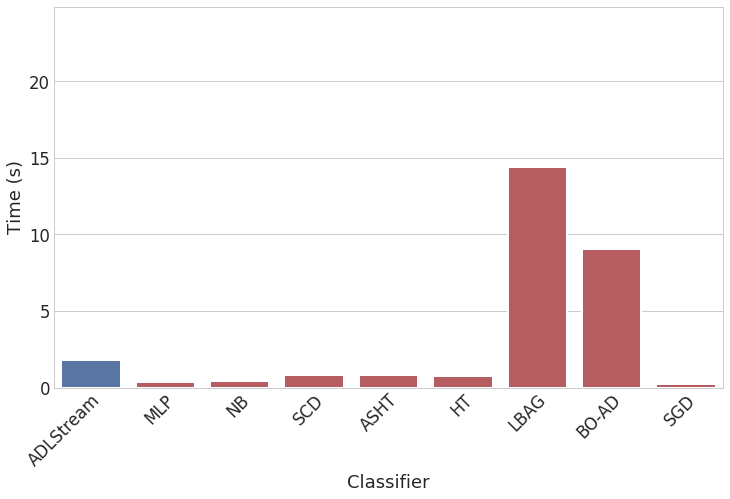

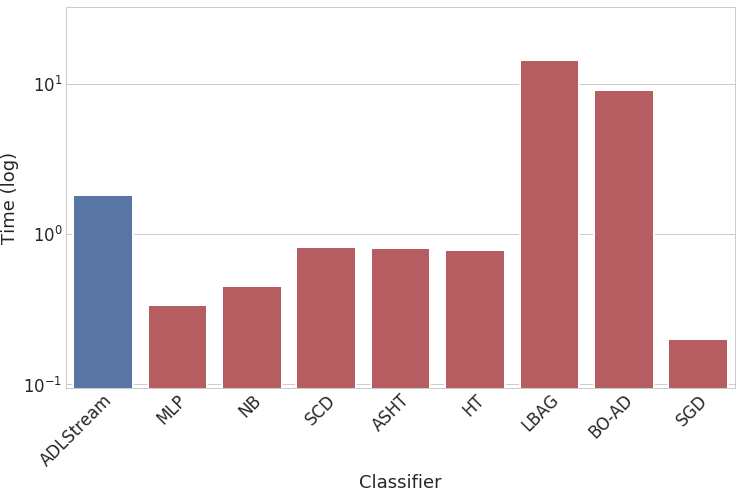

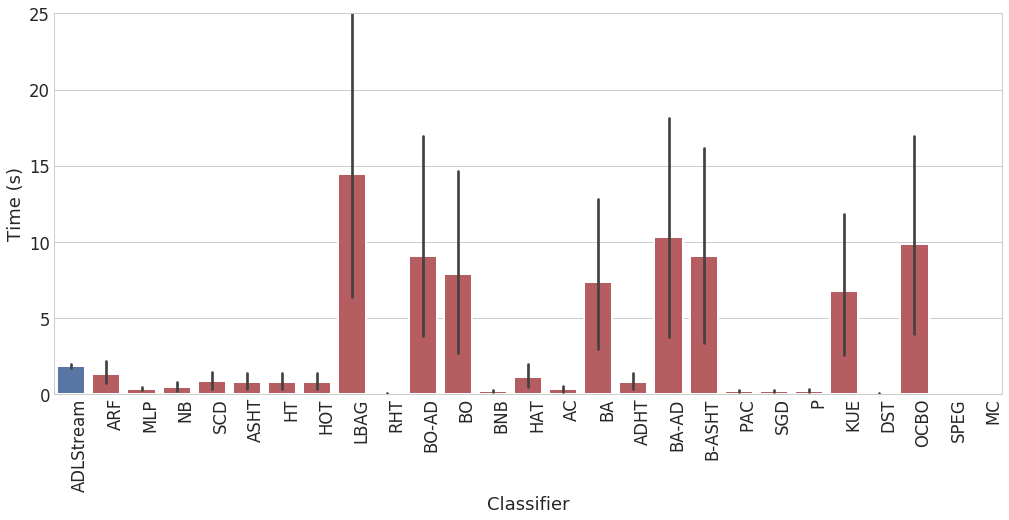

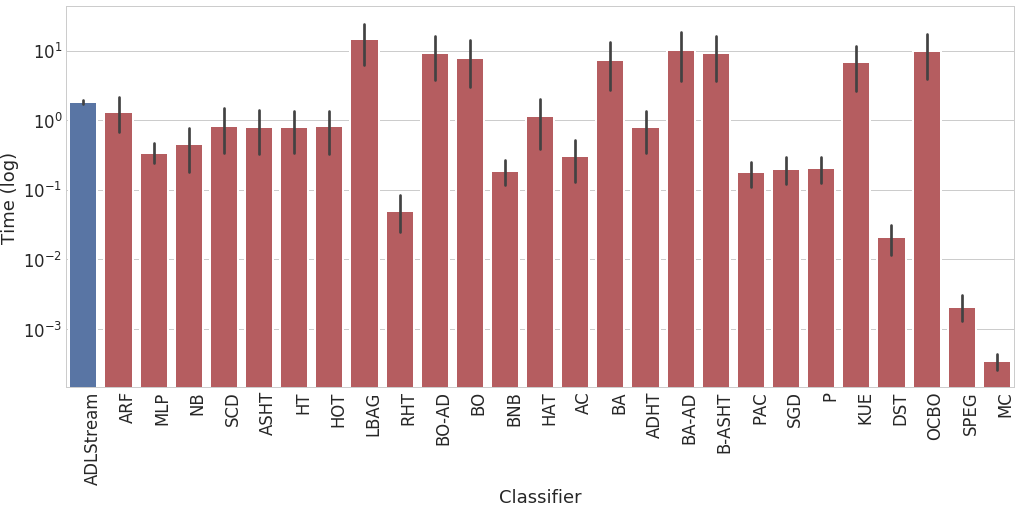

In [11]:
sns.set(font_scale=1.5)
pal_bar = {clf: (pal['ADLStream'] if classifier_labels_full[clf] is 'ADLStream' else pal['CNN']) for clf in set(metrics_table_full.columns)}
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=metrics_table,  ax=ax, errwidth=0, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.savefig("files/plots/barplot-top-time.eps", format='eps', bbox_inches='tight')

sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=metrics_table,  ax=ax, errwidth=0, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.savefig("files/plots/barplot-top-time-log.eps", format='eps', bbox_inches='tight')
    
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(17,7))
    sns.barplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (ms)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_ylim(0,0.025*1000)
    plt.savefig("files/plots/barplot-time.eps", format='eps', bbox_inches='tight')
    
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(17,7))
    sns.barplot(data=metrics_table_full[metrics_table_full.columns[1:]],  ax=ax, edgecolor="1.0", linewidth=2, palette=pal_bar)
    ax.set_ylabel('Time (log)')
    ax.set_xticklabels(abbr_full_ls[1:], rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    ax.set_yscale("log")
    plt.savefig("files/plots/barplot-time-log.eps", format='eps', bbox_inches='tight')
    

In [11]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['classifier'] = [classifier_labels_full[clf] for clf in metrics_aux['classifier']]
metrics_aux['dataset_n'] = [datasets_dict[d] for d in metrics_aux['dataset']]
metrics_aux = metrics_aux.sort_values('dataset_n')
metrics_aux

/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,instancespersecond,timeperinstance,minutes,dataset_n
7983,TwoPatterns,CNN,5000,128,4,0.998229,0.997534,0.340802,0.001188,0.341990,170.060359,0.592750,170.653110,29.299202,34.130622,2.844218,1
8089,TwoPatterns,ADLStream,4910,128,4,0.999989,0.999982,0.141712,0.087445,0.229157,7.794133,4.809502,7.794133,629.960989,1.587400,0.129902,1
478,CinCECGtorso,CNN,1420,1639,4,0.802216,0.721376,2.937070,0.004514,2.941584,414.126924,0.636423,414.763346,3.423639,292.086864,6.912722,2
584,CinCECGtorso,ADLStream,1330,1639,4,0.998249,0.997410,0.203596,0.144402,0.347998,3.053936,2.166033,3.053936,435.503593,2.296192,0.050899,2
7836,TwoLeadECG,CNN,1162,82,2,0.987537,0.996036,0.227822,0.001333,0.229155,26.427396,0.154640,26.582036,43.713732,22.876107,0.443034,3
7942,TwoLeadECG,ADLStream,1072,82,2,0.998001,0.995836,0.169963,0.125902,0.295865,2.039558,1.510819,2.039558,525.603971,1.902573,0.033993,3
8677,Wafer,ADLStream,7074,152,2,0.999063,0.997124,0.130640,0.076438,0.207079,10.320596,6.038617,10.320596,685.425533,1.458948,0.172010,4
8571,Wafer,CNN,7164,152,2,0.889121,0.874000,0.383839,0.001213,0.385052,274.828764,0.868425,275.697190,25.985031,38.483695,4.594953,4
9261,pendigits,CNN,10992,16,10,0.960480,0.952094,0.115867,0.000729,0.116596,127.337528,0.801213,128.138741,85.782020,11.657455,2.135646,5
9367,pendigits,ADLStream,10902,16,10,0.988656,0.986177,0.110910,0.068473,0.179383,13.530990,8.353696,13.530990,805.705991,1.241148,0.225517,5


/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/share/venv/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


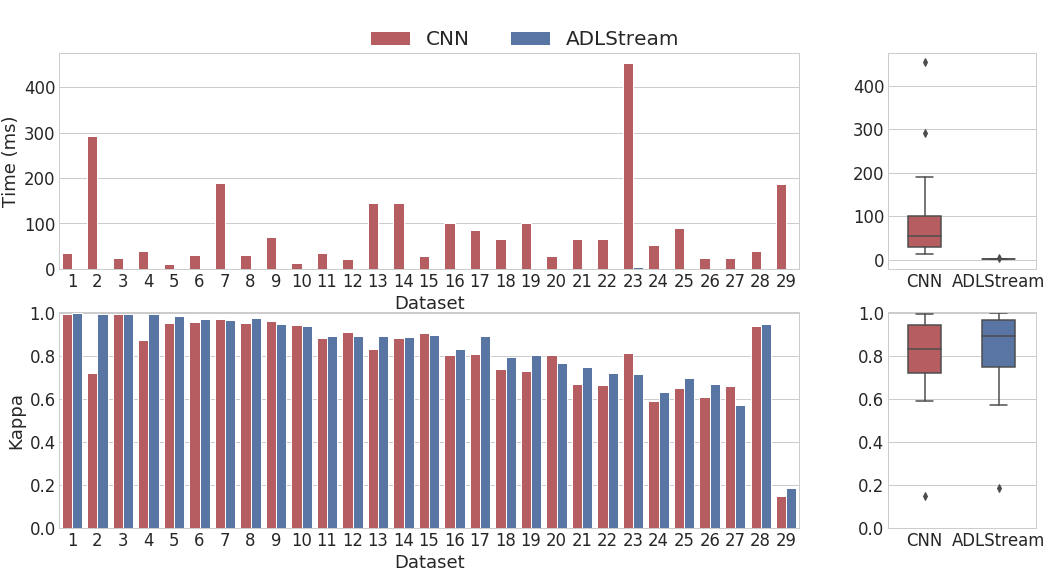

In [12]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['classifier'] = [classifier_labels_full[clf] for clf in metrics_aux['classifier']]
metrics_aux['dataset_n'] = [datasets_dict[d] for d in metrics_aux['dataset']]
metrics_aux = metrics_aux.sort_values('dataset_n')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(2,2,figsize=(17.5,8.75), gridspec_kw = {'width_ratios':[5, 1]})
    sns.barplot(data=metrics_aux,  ax=ax[0][0], x='dataset_n', y=_METRIC, hue='classifier', palette=pal)
    ax[0][0].set_ylabel('Time (ms)')
    ax[0][0].set_xlabel('Dataset')
    #ax[0][0].set_ylim((0,700))
    
    handles, labels = ax[0][0].get_legend_handles_labels()
    ax[0][0].get_legend().remove()
    
    sns.boxplot(data=metrics_aux[['classifier', _METRIC, 'dataset']], x="classifier", y=_METRIC, ax=ax[0,1], palette=pal, width=0.45)
    ax[0][1].set_xlabel('')
    ax[0][1].set_ylabel('')
    #ax[0][1].set_ylim((0,700))
        
    sns.barplot(data=metrics_aux,  ax=ax[1][0], x='dataset_n', y='kappa', hue='classifier', palette=pal)
    ax[1][0].set_ylabel('Kappa')
    ax[1][0].set_xlabel('Dataset')
    ax[1][0].get_legend().remove()    
    ax[1][0].set_ylim((0,1.005))
    
    sns.boxplot(data=metrics_aux[['classifier', 'kappa', 'dataset']], x="classifier", y='kappa', ax=ax[1,1], palette=pal, width=0.45)
    ax[1][1].set_xlabel('')
    ax[1][1].set_ylabel('')
    ax[1][1].set_ylim((0,1.005))
    
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=20, borderpad=0.0, borderaxespad=1.5)# bbox_to_anchor=(0.5, 0.86))
    plt.savefig("files/plots/sequential-comparison.eps", format='eps', bbox_inches='tight')

    

In [13]:
metrics_aux_table = metrics_aux.pivot(index='dataset', columns='classifier', values=_METRIC) 
metrics_aux_table['CNN/ADLStream'] = metrics_aux_table['CNN'] / metrics_aux_table['ADLStream']
metrics_aux_table

classifier,ADLStream,CNN,CNN/ADLStream
dataset,,,
ChlorineConcentration,1.408722,39.228357,27.846774
CinCECGtorso,2.296192,292.086864,127.204879
ECG5000,1.401425,34.379106,24.531534
ElectricDevices,1.403417,27.304429,19.455672
FaceAll,1.640330,31.147098,18.988311
FacesUCR,1.748797,31.201025,17.841426
FordA,1.975218,99.978750,50.616553
FordB,1.648391,100.458698,60.943494
HandOutlines,3.323465,453.426375,136.431810


In [15]:
print("max: ", metrics_aux_table['CNN/ADLStream'].max())
print("min: ", metrics_aux_table['CNN/ADLStream'].min())
print("mean: ", metrics_aux_table['CNN/ADLStream'].mean())

max:  146.02467174563873
min:  6.777708761453975
mean:  44.73280200452568


In [16]:
metrics_aux_table = metrics_aux.pivot(index='dataset', columns='classifier', values=[_METRIC, 'kappa']) 
metrics_aux_table['dataset_n'] = [datasets_dict[d] for d in metrics_aux_table.index]
metrics_aux_table = metrics_aux_table.sort_values('dataset_n')
del metrics_aux_table['dataset_n']

metrics_aux_table.to_csv('./files/sequential-parallel-results.csv', sep=',', encoding='utf-8')
metrics_aux_table

timeperinstance                 kappa          
classifier                       ADLStream         CNN ADLStream       CNN
dataset                                                                   
TwoPatterns                       1.587400   34.130622  0.999982  0.997534
CinCECGtorso                      2.296192  292.086864  0.997410  0.721376
TwoLeadECG                        1.902573   22.876107  0.995836  0.996036
Wafer                             1.458948   38.483695  0.997124  0.874000
pendigits                         1.241148   11.657455  0.986177  0.952094
FacesUCR                          1.748797   31.201025  0.974315  0.957582
Mallat                            1.937608  189.533397  0.969640  0.973497
FaceAll                           1.640330   31.147098  0.977290  0.953781
Symbols                           2.127778   70.166125  0.950480  0.961480
ItalyPowerDemand                  1.971071   12.262316  0.939397  0.943397
ECG5000                           1.401425   34.379106  0.894935  0.885228
MoteStrain                        2.036596   22.151547  0.894516  0.911419
NonInvasiveFetalECGThorax1        1.889758  144.901153  0.893001  0.831313
NonInvasiveFetalECGThorax2        1.911109  144.751273  0.887571  0.883795
SwedishLeaf                       2.047666   28.328945  0.896721  0.908321
FordA                             1.975218   99.978750  0.831710  0.806356
Yoga                              1.704891   85.624562  0.893695  0.812517
UWaveGestureLibraryX              1.580403   66.483778  0.797814  0.742314
FordB                             1.648391  100.458698  0.807580  0.732232
ElectricDevices                   1.403417   27.304429  0.767867  0.807867
UWaveGestureLibraryY              1.650248   66.500931  0.751504  0.671944
UWaveGestureLibraryZ              1.555601   66.487937  0.719889  0.664091
HandOutlines                      3.323465  453.426375  0.717150  0.814150
InsectWingbeatSound               1.650758   53.231654  0.632102  0.590804
ShapesAll                         2.191248   90.354470  0.696359  0.652709
MedicalImages                     1.887336   23.931840  0.668554  0.609829
PhalangesOutlinesCorrect          1.791180   23.418585  0.574679  0.662415
ChlorineConcentration             1.408722   39.228357  0.948243  0.942341
Phoneme                           1.820957  186.394302  0.189648  0.150143